# Preprocesamiento y Análisis Exploratorio de Datos de Viviendas en Andalucía

Un cuaderno Jupyter para el preprocesamiento y análisis exploratorio de datos de viviendas en venta en Andalucía.

## Carga de Librerías y Conjunto de Datos
Importar librerías esenciales como pandas, numpy, matplotlib y seaborn. Cargar el archivo CSV de viviendas en un DataFrame de pandas. Mostrar las primeras filas del DataFrame (`head()`) para una vista previa inicial y verificar la correcta carga de los datos. Incluir comentarios sobre los datos cargados.

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
%matplotlib inline
sns.set(style="whitegrid")

In [20]:
# Cargar el conjunto de datos
# Reemplaza 'nombre_del_archivo.csv' con el nombre real de tu archivo de datos.
# Asegúrate de que el archivo CSV esté en la misma carpeta que este notebook,
# o proporciona la ruta completa al archivo.
try:
    df = pd.read_csv('../data/processed/andalucia_raw.csv') # Ejemplo de nombre de archivo
except FileNotFoundError:
    print("Archivo no encontrado. Asegúrate de que 'andalucia_raw.csv' existe en la ruta correcta.")
    df = pd.DataFrame() # Crear un DataFrame vacío para evitar errores en celdas posteriores si el archivo no se carga

# Mostrar las primeras filas del DataFrame
if not df.empty:
    print("Primeras 5 filas del conjunto de datos:")
    print(df.head())
else:
    print("El DataFrame está vacío porque el archivo no se pudo cargar.")

Primeras 5 filas del conjunto de datos:
     Price Property Type  Size (m2)  Number of Rooms  Number of Bathrooms  \
0   5800.0  countryHouse      168.0                4                    1   
1   9000.0        chalet       60.0                2                    1   
2   9500.0        chalet      115.0                3                    1   
3   9900.0        chalet       81.0                3                    2   
4  10000.0          flat       45.0                2                    1   

    Latitude  Longitude              Location  
0  37.118491  -2.538960      el almendral s/n  
1  37.353431  -2.298467     calle San Antonio  
2  37.354983  -2.296607         Olula del Río  
3  37.038685  -2.744675       calle Lucero, 3  
4  36.840707  -2.476512  calle Juan Goytisolo  


### Comentarios sobre los Datos Cargados
*   Verificar que las columnas se han cargado correctamente con los nombres esperados.
*   Observar los tipos de datos inferidos inicialmente por pandas.
*   Identificar si el separador del CSV (coma, punto y coma, etc.) fue el correcto.
*   Anotar cualquier observación inmediata sobre los valores (ej. presencia de unidades en columnas numéricas, formatos de fecha, etc.).

## Inspección Inicial del Conjunto de Datos
Realizar una inspección básica del DataFrame: usar `info()` para obtener un resumen de los tipos de datos por columna y el conteo de valores no nulos. Utilizar `describe()` para obtener estadísticas descriptivas de las columnas numéricas (media, desviación estándar, mínimos, máximos, cuartiles). Comprobar las dimensiones del DataFrame (`shape`). Documentar las observaciones iniciales sobre la estructura y contenido.

In [5]:
# Información general del DataFrame
if not df.empty:
    print("Información general del DataFrame:")
    df.info()
else:
    print("El DataFrame está vacío.")

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213360 entries, 0 to 213359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Price                213360 non-null  float64
 1   Property Type        213360 non-null  object 
 2   Size (m2)            213360 non-null  float64
 3   Number of Rooms      213360 non-null  int64  
 4   Number of Bathrooms  213360 non-null  int64  
 5   Latitude             213360 non-null  float64
 6   Longitude            213360 non-null  float64
 7   Location             213360 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 13.0+ MB


In [6]:
# Estadísticas descriptivas de las columnas numéricas
if not df.empty:
    print("\nEstadísticas descriptivas:")
    # Incluir todos los tipos para una visión más completa, luego filtrar si es necesario
    print(df.describe(include='all'))
else:
    print("El DataFrame está vacío.")


Estadísticas descriptivas:
               Price Property Type      Size (m2)  Number of Rooms  \
count   2.133600e+05        213360  213360.000000    213360.000000   
unique           NaN             6            NaN              NaN   
top              NaN        chalet            NaN              NaN   
freq             NaN        109636            NaN              NaN   
mean    7.515792e+05           NaN     441.877824         3.770829   
std     1.877872e+06           NaN    9431.845459         2.240825   
min     3.525000e+03           NaN       9.000000         0.000000   
25%     6.200000e+04           NaN      89.000000         3.000000   
50%     1.074750e+05           NaN     140.000000         3.000000   
75%     5.900000e+05           NaN     280.000000         5.000000   
max     3.500000e+07           NaN  999999.000000        70.000000   

        Number of Bathrooms       Latitude      Longitude Location  
count         213360.000000  213360.000000  213360.000000   21

In [7]:
# Dimensiones del DataFrame (filas, columnas)
if not df.empty:
    print("\nDimensiones del DataFrame (filas, columnas):")
    print(df.shape)
else:
    print("El DataFrame está vacío.")


Dimensiones del DataFrame (filas, columnas):
(213360, 8)


### Observaciones Iniciales
*   **Tipos de Datos:** Anotar columnas que podrían necesitar conversión de tipo (ej. object a numérico o datetime).
*   **Valores Nulos:** Identificar columnas con un alto porcentaje de valores ausentes. `info()` da una primera pista.
*   **Estadísticas Descriptivas:**
    *   Para columnas numéricas: observar rangos (min-max), media vs. mediana (para asimetría), desviación estándar (dispersión).
    *   Para columnas categóricas (object): `describe(include='object')` mostrará conteos, valores únicos, el más frecuente (top) y su frecuencia (freq).
*   **Dimensiones:** Anotar el número total de registros y características.

## Manejo de Valores Ausentes y Duplicados
Identificar y cuantificar los valores ausentes (`isnull().sum()`) en cada columna. Discutir y aplicar estrategias para tratar estos valores (ej. eliminación de filas/columnas, imputación con media/mediana/moda). Identificar y eliminar filas duplicadas (`duplicated().sum()`, `drop_duplicates()`). Justificar las decisiones tomadas y comentar el impacto en el dataset.

In [8]:
# Identificar y cuantificar valores ausentes
if not df.empty:
    print("Valores ausentes por columna:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0]) # Mostrar solo columnas con valores ausentes
else:
    print("El DataFrame está vacío.")

Valores ausentes por columna:
Series([], dtype: int64)


### Estrategias para Tratar Valores Ausentes
*   **Eliminación:**
    *   **Filas:** Si el porcentaje de datos ausentes en una fila es muy alto o si la cantidad de filas con ausentes es pequeña respecto al total.
    *   **Columnas:** Si una columna tiene demasiados valores ausentes y no es crucial para el análisis, o si la información no puede ser recuperada.
*   **Imputación:**
    *   **Media/Mediana:** Para variables numéricas. La mediana es preferible si hay outliers.
    *   **Moda:** Para variables categóricas.
    *   **Valor Constante:** Usar un valor específico (ej. "Desconocido" para categorías, 0 para números si tiene sentido).
    *   **Imputación Avanzada:** Modelos predictivos (ej. k-NN) para predecir los valores ausentes.

La elección dependerá del contexto, la cantidad de datos ausentes y la naturaleza de la variable.

In [9]:
# Ejemplo de manejo de valores ausentes (adaptar según sea necesario)
if not df.empty:
    # Opción 1: Eliminar filas con cualquier valor ausente (usar con precaución)
    # df_cleaned = df.dropna()
    # print(f"Filas antes de dropna: {len(df)}, Filas después: {len(df_cleaned)}")

    # Opción 2: Eliminar columnas con más de un X% de valores ausentes
    # threshold = len(df) * 0.5 # Ejemplo: 50%
    # df_cleaned = df.dropna(thresh=threshold, axis=1)

    # Opción 3: Imputar valores ausentes
    # Para columnas numéricas (ej. 'precio', 'superficie'):
    # df['precio'].fillna(df['precio'].median(), inplace=True)
    # df['superficie'].fillna(df['superficie'].mean(), inplace=True)
    
    # Para columnas categóricas (ej. 'tipo_inmueble'):
    # df['tipo_inmueble'].fillna(df['tipo_inmueble'].mode()[0], inplace=True)
    
    # Por ahora, solo mostraremos cómo se haría, pero no modificaremos df directamente
    # hasta que se decida la estrategia específica.
    print("Ejemplo: Si 'columna_numerica_ejemplo' tuviera NaN, se podría imputar con la mediana.")
    # if 'columna_numerica_ejemplo' in df.columns:
    #     df['columna_numerica_ejemplo'].fillna(df['columna_numerica_ejemplo'].median(), inplace=True)
    
    print("\nRevisar valores ausentes después de la estrategia aplicada (si se aplicó alguna):")
    # print(df.isnull().sum()[df.isnull().sum() > 0])
else:
    print("El DataFrame está vacío.")

Ejemplo: Si 'columna_numerica_ejemplo' tuviera NaN, se podría imputar con la mediana.

Revisar valores ausentes después de la estrategia aplicada (si se aplicó alguna):


In [10]:
# Identificar filas duplicadas
if not df.empty:
    print("\nNúmero de filas duplicadas:")
    num_duplicates = df.duplicated().sum()
    print(num_duplicates)
else:
    print("El DataFrame está vacío.")


Número de filas duplicadas:
188339


In [11]:
# Eliminar filas duplicadas (si existen y se decide hacerlo)
if not df.empty and num_duplicates > 0:
    df_original_shape = df.shape
    df.drop_duplicates(inplace=True)
    print(f"\nDimensiones originales: {df_original_shape}")
    print(f"Dimensiones después de eliminar duplicados: {df.shape}")
else:
    print("\nNo hay duplicados para eliminar o el DataFrame está vacío.")


Dimensiones originales: (213360, 8)
Dimensiones después de eliminar duplicados: (25021, 8)


### Justificación y Comentarios sobre el Manejo de Ausentes/Duplicados
*   **Valores Ausentes:** Documentar qué columnas tenían valores ausentes, cuántos, y qué estrategia se aplicó (ej. "La columna 'baños' tenía un 20% de ausentes; se imputaron con la mediana debido a la distribución asimétrica").
*   **Duplicados:** Indicar si se encontraron y eliminaron filas duplicadas. La eliminación de duplicados es generalmente una buena práctica para evitar sesgos.
*   **Impacto:** Comentar cómo estas operaciones han afectado las dimensiones del dataset.

## Limpieza y Transformación de Datos
Convertir columnas a sus tipos de datos correctos si es necesario (ej. columnas de precios a tipo numérico, fechas a tipo datetime) usando `astype()`. Limpiar columnas de texto que puedan contener unidades o caracteres especiales (ej. '€', 'm²', etc.) para facilitar el análisis numérico, utilizando funciones de string de pandas. Documentar cada transformación y su propósito.

In [12]:
# Ejemplo de conversión de tipos y limpieza de columnas
if not df.empty:
    print("Tipos de datos antes de la transformación:")
    print(df.dtypes)

    # Ejemplo: Convertir columna 'precio' a numérico (si es object y contiene '€' o '.')
    # Asumimos que 'precio' es una columna que podría estar como '150.000 €'
    if 'precio' in df.columns and df['precio'].dtype == 'object':
        print("\nTransformando columna 'precio'...")
        # Eliminar '€', reemplazar '.' de miles y ',' de decimales si es necesario
        # Esta es una limpieza genérica, adaptar a los datos específicos
        df['precio_str'] = df['precio'].astype(str) # Asegurar que es string
        df['precio'] = df['precio_str'].str.replace('€', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).str.strip()
        # Convertir a numérico, los errores se convierten en NaN
        df['precio'] = pd.to_numeric(df['precio'], errors='coerce')
        df.drop(columns=['precio_str'], inplace=True, errors='ignore') # Eliminar columna temporal
        print("Columna 'precio' transformada.")

    # Ejemplo: Convertir columna 'superficie' a numérico (si es object y contiene 'm²')
    # Asumimos que 'superficie' es una columna que podría estar como '120 m²'
    if 'superficie' in df.columns and df['superficie'].dtype == 'object':
        print("\nTransformando columna 'superficie'...")
        df['superficie_str'] = df['superficie'].astype(str) # Asegurar que es string
        df['superficie'] = df['superficie_str'].str.replace('m²', '', regex=False).str.extract(r'(\d+)').astype(float) # Extraer solo números
        df.drop(columns=['superficie_str'], inplace=True, errors='ignore') # Eliminar columna temporal
        print("Columna 'superficie' transformada.")

    # Ejemplo: Convertir una columna de fecha (si existe y es object)
    # if 'fecha_publicacion' in df.columns and df['fecha_publicacion'].dtype == 'object':
    #     print("\nTransformando columna 'fecha_publicacion' a datetime...")
    #     df['fecha_publicacion'] = pd.to_datetime(df['fecha_publicacion'], errors='coerce')
    #     print("Columna 'fecha_publicacion' transformada.")

    print("\nTipos de datos después de la transformación:")
    print(df.dtypes)
    
    # Verificar si las transformaciones introdujeron nuevos NaNs
    print("\nValores ausentes después de transformaciones:")
    print(df.isnull().sum()[df.isnull().sum() > 0])
else:
    print("El DataFrame está vacío.")

Tipos de datos antes de la transformación:
Price                  float64
Property Type           object
Size (m2)              float64
Number of Rooms          int64
Number of Bathrooms      int64
Latitude               float64
Longitude              float64
Location                object
dtype: object

Tipos de datos después de la transformación:
Price                  float64
Property Type           object
Size (m2)              float64
Number of Rooms          int64
Number of Bathrooms      int64
Latitude               float64
Longitude              float64
Location                object
dtype: object

Valores ausentes después de transformaciones:
Series([], dtype: int64)


### Documentación de Transformaciones
*   **Columna 'precio':** (Ejemplo) Convertida de `object` a `float`. Se eliminaron los símbolos '€' y los separadores de miles ('.') y se reemplazó la coma decimal ',' por '.' antes de la conversión. Los valores no convertibles se transformaron en NaN.
*   **Columna 'superficie':** (Ejemplo) Convertida de `object` a `float`. Se eliminó 'm²' y se extrajeron los valores numéricos.
*   **Otras Columnas:** Documentar cualquier otra transformación realizada (ej. 'habitaciones', 'baños' a `int` si son `float` sin decimales o `object`).
*   **Nuevos NaNs:** Es importante revisar si las operaciones de limpieza (ej. `pd.to_numeric(errors='coerce')`) introdujeron nuevos valores NaN y decidir cómo manejarlos.

## Análisis Exploratorio de Datos (EDA) - Univariante
Analizar la distribución de variables numéricas clave (ej. precio, superficie, número de habitaciones) mediante histogramas y diagramas de caja (boxplots) para identificar la forma de la distribución, la tendencia central, la dispersión y posibles valores atípicos. Analizar la frecuencia de variables categóricas importantes (ej. provincia, ciudad, tipo de inmueble) utilizando gráficos de barras. Interpretar cada gráfico y extraer conclusiones.

In [13]:
# EDA Univariante - Variables Numéricas
if not df.empty:
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    # Columnas de ejemplo, adaptar a las columnas numéricas relevantes de tu dataset
    cols_to_plot_numeric = [col for col in ['precio', 'superficie', 'habitaciones', 'baños'] if col in numerical_cols]

    for col in cols_to_plot_numeric:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            sns.histplot(df[col], kde=True)
            plt.title(f'Histograma de {col}')

            plt.subplot(1, 2, 2)
            sns.boxplot(y=df[col])
            plt.title(f'Boxplot de {col}')

            plt.tight_layout()
            plt.show()
            
            print(f"Estadísticas descriptivas para '{col}':")
            print(df[col].describe())
            print("-" * 50)
        else:
            print(f"La columna '{col}' no es numérica o no existe. Saltando gráfico.")
else:
    print("El DataFrame está vacío. No se pueden generar gráficos univariantes numéricos.")

In [14]:
# EDA Univariante - Variables Categóricas
if not df.empty:
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    # Columnas de ejemplo, adaptar a las columnas categóricas relevantes de tu dataset
    # También se pueden incluir columnas numéricas que representen categorías, como 'num_habitaciones' si se trata como tal.
    cols_to_plot_categorical = [col for col in ['provincia', 'ciudad', 'tipo_inmueble', 'estado_conservacion'] if col in df.columns]

    for col in cols_to_plot_categorical:
        if col in df.columns:
            plt.figure(figsize=(10, 6))
            # Si hay muchas categorías únicas, mostrar solo las N más frecuentes
            top_n = 15 
            if df[col].nunique() > top_n:
                sns.countplot(y=df[col], order=df[col].value_counts().iloc[:top_n].index, palette="viridis")
                plt.title(f'Top {top_n} Frecuencias de {col}')
            else:
                sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
                plt.title(f'Frecuencia de {col}')
            plt.xlabel('Frecuencia')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()
            
            print(f"Frecuencias para '{col}':")
            print(df[col].value_counts(normalize=True).head()) # Mostrar porcentajes de los más frecuentes
            print("-" * 50)
        else:
            print(f"La columna '{col}' no existe. Saltando gráfico.")
else:
    print("El DataFrame está vacío. No se pueden generar gráficos univariantes categóricos.")

### Interpretación de Gráficos Univariantes
*   **Variables Numéricas (Histogramas y Boxplots):**
    *   **Distribución:** ¿Es simétrica, sesgada a la derecha (positiva), sesgada a la izquierda (negativa)? ¿Es unimodal, bimodal, multimodal?
    *   **Tendencia Central:** ¿Dónde se concentran los datos (media, mediana)?
    *   **Dispersión:** ¿Cuán dispersos están los datos (rango intercuartílico, desviación estándar)?
    *   **Outliers:** ¿Hay valores atípicos significativos visibles en los boxplots? ¿Cómo podrían afectar al análisis?
*   **Variables Categóricas (Gráficos de Barras):**
    *   **Frecuencias:** ¿Cuáles son las categorías más y menos comunes?
    *   **Desbalance:** ¿Hay alguna categoría que domine fuertemente? Esto es importante para el modelado.
    *   **Número de Categorías Únicas:** Un número muy alto de categorías únicas puede requerir agrupación o técnicas de codificación especiales.

## Análisis Exploratorio de Datos (EDA) - Bivariante y Multivariante
Explorar relaciones entre pares de variables. Usar diagramas de dispersión (scatter plots) para visualizar la relación entre variables numéricas (ej. precio vs. superficie, precio vs. número de habitaciones). Calcular y visualizar la matriz de correlación (heatmap) entre las variables numéricas para identificar correlaciones lineales. Comentar los patrones y relaciones observadas.

In [15]:
# EDA Bivariante - Numérica vs Numérica (Scatter plots)
if not df.empty:
    # Asumimos que 'precio' es nuestra variable objetivo principal
    target_variable = 'precio'
    
    # Seleccionar algunas variables numéricas para comparar con el precio
    # Asegurarse de que estas columnas existen y son numéricas después de la limpieza
    numerical_features_for_scatter = [col for col in ['superficie', 'habitaciones', 'baños'] if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

    if target_variable in df.columns and pd.api.types.is_numeric_dtype(df[target_variable]):
        for feature in numerical_features_for_scatter:
            if feature != target_variable: # Evitar plotear una variable contra sí misma
                plt.figure(figsize=(8, 6))
                sns.scatterplot(data=df, x=feature, y=target_variable, alpha=0.5)
                plt.title(f'Relación entre {target_variable} y {feature}')
                plt.xlabel(feature)
                plt.ylabel(target_variable)
                plt.show()
    else:
        print(f"La variable objetivo '{target_variable}' no es numérica o no existe.")
else:
    print("El DataFrame está vacío. No se pueden generar scatter plots.")

La variable objetivo 'precio' no es numérica o no existe.


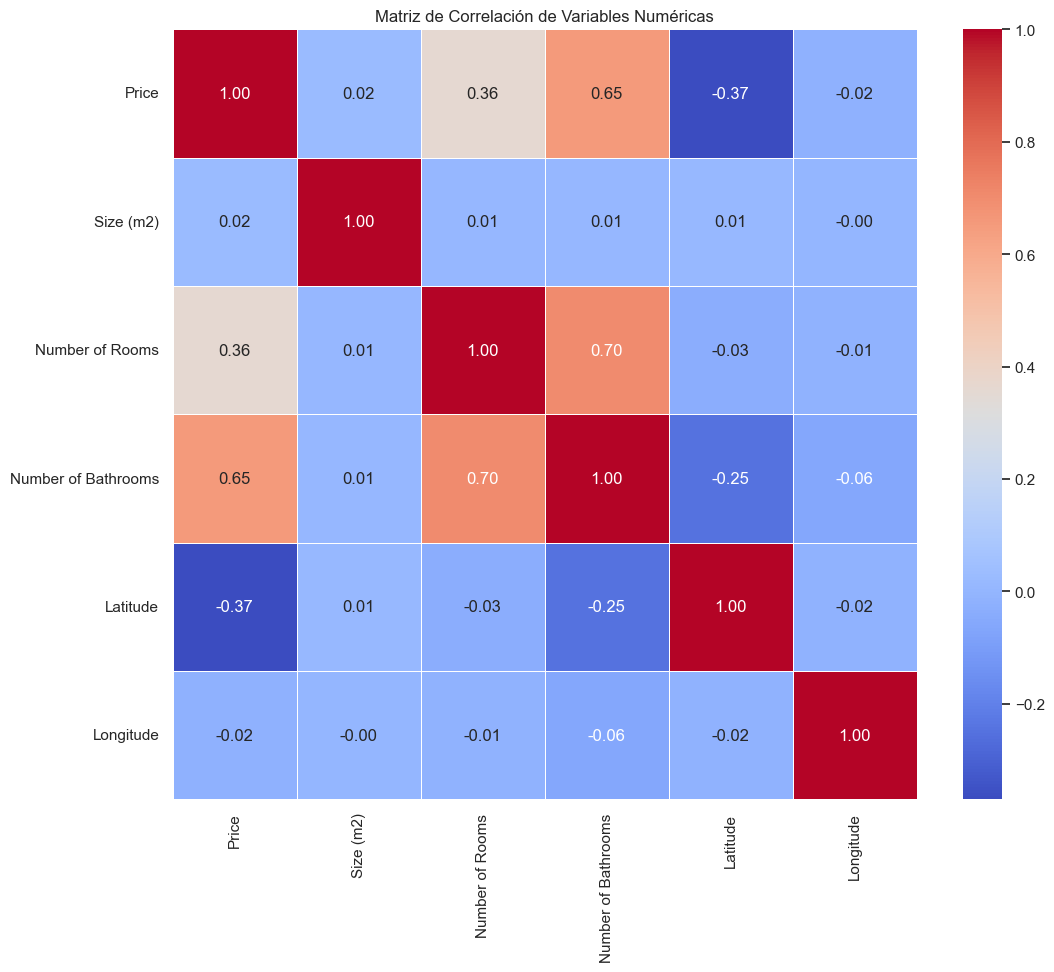


Correlaciones con la variable 'precio' (ordenadas):
La columna 'precio' no está en las variables numéricas para correlación.


In [16]:
# EDA Bivariante/Multivariante - Matriz de Correlación (Heatmap)
if not df.empty:
    # Seleccionar solo columnas numéricas para la matriz de correlación
    df_numeric = df.select_dtypes(include=np.number)
    
    if not df_numeric.empty:
        correlation_matrix = df_numeric.corr()
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Matriz de Correlación de Variables Numéricas')
        plt.show()
        
        print("\nCorrelaciones con la variable 'precio' (ordenadas):")
        if 'precio' in correlation_matrix:
            print(correlation_matrix['precio'].sort_values(ascending=False))
        else:
            print("La columna 'precio' no está en las variables numéricas para correlación.")
    else:
        print("No hay suficientes columnas numéricas para generar una matriz de correlación.")
else:
    print("El DataFrame está vacío. No se puede generar la matriz de correlación.")

### Comentarios sobre Patrones y Relaciones (Bivariante/Multivariante)
*   **Scatter Plots (Numérica vs Numérica):**
    *   **Tendencia:** ¿Se observa alguna tendencia (lineal positiva/negativa, no lineal)? Por ejemplo, ¿aumenta el precio con la superficie?
    *   **Fuerza de la Relación:** ¿Cuán agrupados están los puntos alrededor de una posible tendencia?
    *   **Outliers:** ¿Hay puntos que se desvían significativamente del patrón general?
*   **Matriz de Correlación (Heatmap):**
    *   **Correlaciones Fuertes:** Identificar pares de variables con coeficientes de correlación altos (cercanos a 1 o -1).
    *   **Correlaciones con la Variable Objetivo:** Prestar especial atención a las variables que tienen una correlación fuerte con la variable objetivo (ej. 'precio').
    *   **Multicolinealidad:** Identificar si hay variables predictoras fuertemente correlacionadas entre sí, lo cual puede ser un problema para algunos modelos de regresión.
    *   **Ausencia de Correlación Lineal:** Un coeficiente cercano a 0 no implica ausencia de relación, solo ausencia de relación *lineal*.

## Ingeniería de Características
Crear nuevas características (columnas) a partir de las existentes que puedan aportar valor al análisis. Por ejemplo, calcular el precio por metro cuadrado. Explicar la lógica detrás de cada nueva característica creada y cómo podría ser útil para análisis posteriores o modelos predictivos.

In [17]:
# Ingeniería de Características
if not df.empty:
    print("Creando nuevas características...")

    # 1. Precio por metro cuadrado
    if 'precio' in df.columns and 'superficie' in df.columns:
        if pd.api.types.is_numeric_dtype(df['precio']) and pd.api.types.is_numeric_dtype(df['superficie']):
            # Evitar división por cero o por superficie muy pequeña que genere valores irreales
            df['precio_m2'] = df.apply(lambda row: row['precio'] / row['superficie'] if row['superficie'] > 0 else np.nan, axis=1)
            print("- Característica 'precio_m2' creada.")
            # Podríamos querer analizar la distribución de esta nueva característica
            # sns.histplot(df['precio_m2'].dropna(), kde=True)
            # plt.title('Distribución del Precio por Metro Cuadrado')
            # plt.show()
        else:
            print("  - No se pudo crear 'precio_m2': 'precio' o 'superficie' no son numéricas.")
    else:
        print("  - No se pudo crear 'precio_m2': Faltan las columnas 'precio' o 'superficie'.")

    # 2. Antigüedad de la propiedad (si hay columna de año de construcción)
    # if 'ano_construccion' in df.columns:
    #     from datetime import datetime
    #     current_year = datetime.now().year
    #     if pd.api.types.is_numeric_dtype(df['ano_construccion']):
    #         df['antiguedad'] = current_year - df['ano_construccion']
    #         print("- Característica 'antiguedad' creada.")
    #     else:
    #         print("  - No se pudo crear 'antiguedad': 'ano_construccion' no es numérica.")
    # else:
    #     print("  - No se pudo crear 'antiguedad': Falta la columna 'ano_construccion'.")
        
    # 3. Ratio habitaciones/superficie
    # if 'habitaciones' in df.columns and 'superficie' in df.columns:
    #     if pd.api.types.is_numeric_dtype(df['habitaciones']) and pd.api.types.is_numeric_dtype(df['superficie']):
    #         df['hab_por_m2'] = df.apply(lambda row: row['habitaciones'] / row['superficie'] if row['superficie'] > 0 else np.nan, axis=1)
    #         print("- Característica 'hab_por_m2' creada.")
    #     else:
    #         print("  - No se pudo crear 'hab_por_m2': 'habitaciones' o 'superficie' no son numéricas.")
    # else:
    #     print("  - No se pudo crear 'hab_por_m2': Faltan las columnas 'habitaciones' o 'superficie'.")

    print("\nDataFrame con nuevas características (primeras filas):")
    print(df.head())
else:
    print("El DataFrame está vacío. No se pueden crear nuevas características.")

Creando nuevas características...
  - No se pudo crear 'precio_m2': Faltan las columnas 'precio' o 'superficie'.

DataFrame con nuevas características (primeras filas):
     Price Property Type  Size (m2)  Number of Rooms  Number of Bathrooms  \
0   5800.0  countryHouse      168.0                4                    1   
1   9000.0        chalet       60.0                2                    1   
2   9500.0        chalet      115.0                3                    1   
3   9900.0        chalet       81.0                3                    2   
4  10000.0          flat       45.0                2                    1   

    Latitude  Longitude              Location  
0  37.118491  -2.538960      el almendral s/n  
1  37.353431  -2.298467     calle San Antonio  
2  37.354983  -2.296607         Olula del Río  
3  37.038685  -2.744675       calle Lucero, 3  
4  36.840707  -2.476512  calle Juan Goytisolo  


### Lógica y Utilidad de las Nuevas Características
*   **`precio_m2` (Precio por Metro Cuadrado):**
    *   **Lógica:** Normaliza el precio en función de la superficie, permitiendo una comparación más equitativa entre propiedades de diferentes tamaños.
    *   **Utilidad:** Puede ser un indicador clave del valor en diferentes zonas o para diferentes tipos de propiedades. Muy útil para modelos predictivos y para entender la valoración del mercado.
*   **`antiguedad` (Antigüedad de la Propiedad):**
    *   **Lógica:** Calcula cuántos años tiene la propiedad. Requiere una columna `ano_construccion`.
    *   **Utilidad:** La antigüedad suele influir en el precio y en el estado de conservación. Puede revelar tendencias de precios para construcciones nuevas vs. antiguas.
*   **`hab_por_m2` (Habitaciones por Metro Cuadrado):**
    *   **Lógica:** Indica la "densidad" de habitaciones en una propiedad.
    *   **Utilidad:** Podría ayudar a identificar distribuciones eficientes o propiedades con muchas habitaciones pequeñas vs. pocas habitaciones grandes.

Es importante verificar las nuevas características (distribución, valores ausentes) después de crearlas.

## Análisis Específico del Mercado Inmobiliario Andaluz
Realizar análisis más enfocados en el contexto del mercado inmobiliario. Por ejemplo: calcular y comparar precios medios/medianos por provincia o ciudad importante. Analizar las características más comunes de las viviendas en diferentes segmentos de precio. Si los datos lo permiten, visualizar la distribución geográfica de las propiedades o de alguna variable de interés (ej. precio medio por zona). Extraer conclusiones específicas sobre el mercado inmobiliario andaluz basadas en los datos.

In [18]:
# Análisis de Precios Medios/Medianos por Provincia/Ciudad
if not df.empty:
    # Asegurarse de que 'precio' y 'provincia'/'ciudad' existen
    if 'precio' in df.columns and pd.api.types.is_numeric_dtype(df['precio']):
        if 'provincia' in df.columns:
            plt.figure(figsize=(12, 7))
            # Usar mediana para ser robusto a outliers
            median_price_by_province = df.groupby('provincia')['precio'].median().sort_values(ascending=False)
            sns.barplot(x=median_price_by_province.index, y=median_price_by_province.values, palette="crest")
            plt.title('Precio Mediano de Vivienda por Provincia en Andalucía')
            plt.xlabel('Provincia')
            plt.ylabel('Precio Mediano (€)')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            print("Precio Mediano por Provincia:")
            print(median_price_by_province)
            print("-" * 50)

        if 'ciudad' in df.columns:
            # Considerar solo las N ciudades más frecuentes o con más listados para un gráfico legible
            top_n_cities = 15
            if df['ciudad'].nunique() > top_n_cities:
                common_cities = df['ciudad'].value_counts().nlargest(top_n_cities).index
                df_common_cities = df[df['ciudad'].isin(common_cities)]
            else:
                df_common_cities = df.copy()

            if not df_common_cities.empty:
                plt.figure(figsize=(14, 8))
                median_price_by_city = df_common_cities.groupby('ciudad')['precio'].median().sort_values(ascending=False)
                sns.barplot(x=median_price_by_city.index, y=median_price_by_city.values, palette="magma")
                plt.title(f'Precio Mediano de Vivienda por Ciudad (Top {len(median_price_by_city)} Ciudades con más datos)')
                plt.xlabel('Ciudad')
                plt.ylabel('Precio Mediano (€)')
                plt.xticks(rotation=60, ha='right')
                plt.tight_layout()
                plt.show()
                print(f"Precio Mediano por Ciudad (Top {len(median_price_by_city)}):")
                print(median_price_by_city)
                print("-" * 50)
            else:
                print("No hay suficientes datos de ciudades comunes para graficar.")
    else:
        print("La columna 'precio' no es numérica o no existe, o faltan 'provincia'/'ciudad'.")
else:
    print("El DataFrame está vacío.")

La columna 'precio' no es numérica o no existe, o faltan 'provincia'/'ciudad'.


In [19]:
# Análisis de Características por Segmento de Precio
if not df.empty and 'precio' in df.columns and pd.api.types.is_numeric_dtype(df['precio']):
    # Definir segmentos de precio (ej. usando cuantiles)
    # Asegurarse de que hay suficientes datos para que los cuantiles sean significativos
    if len(df['precio'].dropna()) > 100: # Umbral arbitrario para asegurar robustez de cuantiles
        try:
            df['segmento_precio'] = pd.qcut(df['precio'], q=3, labels=['Bajo', 'Medio', 'Alto'], duplicates='drop')
            print("Segmentos de precio definidos (Bajo, Medio, Alto).")

            # Analizar 'tipo_inmueble' por segmento de precio
            if 'tipo_inmueble' in df.columns:
                plt.figure(figsize=(12, 7))
                sns.countplot(data=df, x='segmento_precio', hue='tipo_inmueble', palette="Set2", order=['Bajo', 'Medio', 'Alto'])
                plt.title('Distribución de Tipo de Inmueble por Segmento de Precio')
                plt.xlabel('Segmento de Precio')
                plt.ylabel('Cantidad')
                plt.legend(title='Tipo de Inmueble', bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()
                plt.show()

            # Analizar 'superficie' media por segmento de precio
            if 'superficie' in df.columns and pd.api.types.is_numeric_dtype(df['superficie']):
                plt.figure(figsize=(8, 5))
                sns.boxplot(data=df, x='segmento_precio', y='superficie', palette="Set3", order=['Bajo', 'Medio', 'Alto'])
                plt.title('Distribución de Superficie por Segmento de Precio')
                plt.xlabel('Segmento de Precio')
                plt.ylabel('Superficie (m²)')
                plt.ylim(0, df['superficie'].quantile(0.95) if not df['superficie'].empty else 500) # Limitar y para mejor visualización
                plt.tight_layout()
                plt.show()
        except ValueError as e:
            print(f"No se pudieron crear segmentos de precio (posiblemente por pocos datos o valores no únicos para cuantiles): {e}")
            if 'segmento_precio' in df.columns: # Limpiar si se creó parcialmente
                df.drop(columns=['segmento_precio'], inplace=True)
    else:
        print("No hay suficientes datos de precio para segmentar de forma robusta.")
else:
    print("El DataFrame está vacío o la columna 'precio' no es adecuada para segmentación.")

El DataFrame está vacío o la columna 'precio' no es adecuada para segmentación.


In [ ]:
# Visualización Geográfica (Ejemplo con Scatter Plot si hay latitud/longitud)
# Esto es un placeholder. Se necesitarían columnas de latitud y longitud.
# Y librerías como geopandas, folium o plotly para mapas interactivos.

# if not df.empty and 'latitud' in df.columns and 'longitud' in df.columns:
#     import plotly.express as px
#     # Filtrar outliers de precio para una mejor escala de color si se usa precio como color
#     df_map = df[df['precio'] < df['precio'].quantile(0.99)] # Ejemplo
# 
#     fig = px.scatter_mapbox(df_map,
#                             lat="latitud",
#                             lon="longitud",
#                             color="precio_m2", # o 'precio'
#                             size="superficie", # opcional
#                             hover_name="direccion", # si existe una columna de dirección
#                             hover_data=["precio", "superficie", "provincia"],
#                             color_continuous_scale=px.colors.cyclical.IceFire,
#                             size_max=15,
#                             zoom=6,
#                             height=700,
#                             center={"lat": 37.5, "lon": -4.5}) # Centro aproximado de Andalucía
#     fig.update_layout(mapbox_style="open-street-map")
#     fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#     fig.show()
# else:
#     print("No hay datos de latitud/longitud para visualización geográfica, o el DataFrame está vacío.")
print("Placeholder para visualización geográfica: Se requieren datos de latitud/longitud y librerías geoespaciales.")

### Conclusiones Específicas del Mercado Inmobiliario Andaluz
*   **Variaciones de Precio por Provincia/Ciudad:**
    *   ¿Qué provincias/ciudades tienen los precios medianos más altos y más bajos?
    *   ¿Hay una gran dispersión de precios dentro de las provincias/ciudades?
*   **Características por Segmento de Precio:**
    *   ¿Qué tipos de inmuebles son más comunes en los segmentos de precio alto vs. bajo? (ej. chalets en alto, pisos en bajo/medio).
    *   ¿Cómo varía la superficie media o el número de habitaciones entre los segmentos?
*   **Distribución Geográfica (si se realizó):**
    *   ¿Se observan "hotspots" de precios altos o bajos en el mapa?
    *   ¿Cómo se distribuyen las propiedades por tipo o tamaño geográficamente?
*   **Otras Observaciones:**
    *   Cualquier otro patrón o insight relevante para el mercado andaluz que haya surgido del análisis (ej. relación entre antigüedad y precio por zona, características más demandadas, etc.).

Este análisis final debe resumir los hallazgos más importantes y específicos del contexto del problema.

# Fin del Análisis Exploratorio y Preprocesamiento

El siguiente paso podría ser la preparación de datos para modelado (selección de características, codificación de categóricas, escalado) y la construcción de modelos predictivos.